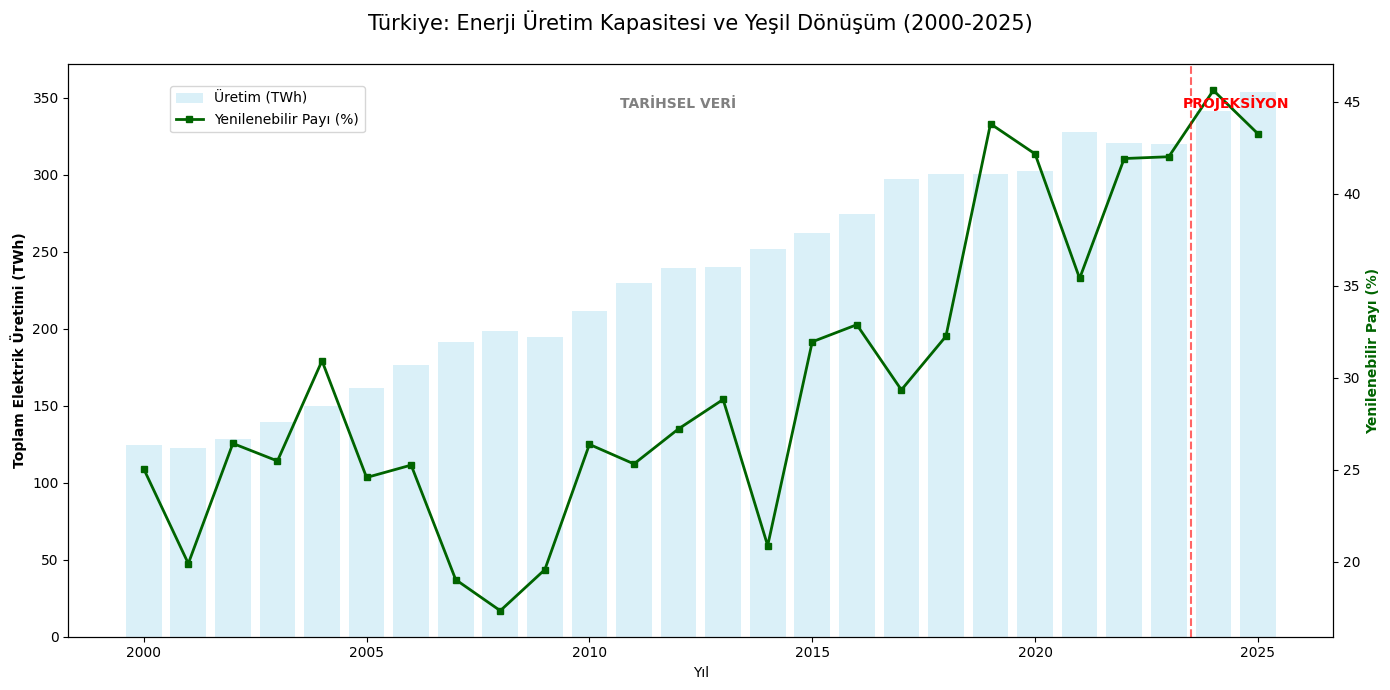


--- 1. VERİ TUTARLILIK ANALİZİ (2020-2023) ---


,year,electricity_generation,renewables_share_elec,ext_gen_twh,ext_renew_pct,gen_sapma_%
0,2020,302.00,42.16,306.0,42.0,-1.31
1,2021,327.88,35.40,331.0,36.0,-0.94
2,2022,320.56,41.91,326.0,42.0,-1.67
3,2023,319.79,42.01,326.0,42.0,-1.90



--- 2. YILLIK ANALİZ VERİLERİ (Son 10 Yıl Detayı) ---


,electricity_generation,elec_gen_growth_pct,renewables_share_elec,solar_share,wind_share
year,,,,,
2016,274.40,4.82,32.89,0.38,5.66
2017,297.29,8.34,29.34,0.97,6.02
2018,300.15,0.96,32.26,2.60,6.62
2019,300.18,0.01,43.80,3.19,7.21
2020,302.00,0.61,42.16,3.71,8.15
2021,327.88,8.57,35.40,4.05,9.46
2022,320.56,-2.23,41.91,4.73,10.82
2023,319.79,-0.24,42.01,5.75,10.59
2024,341.23,6.70,45.61,7.52,10.71


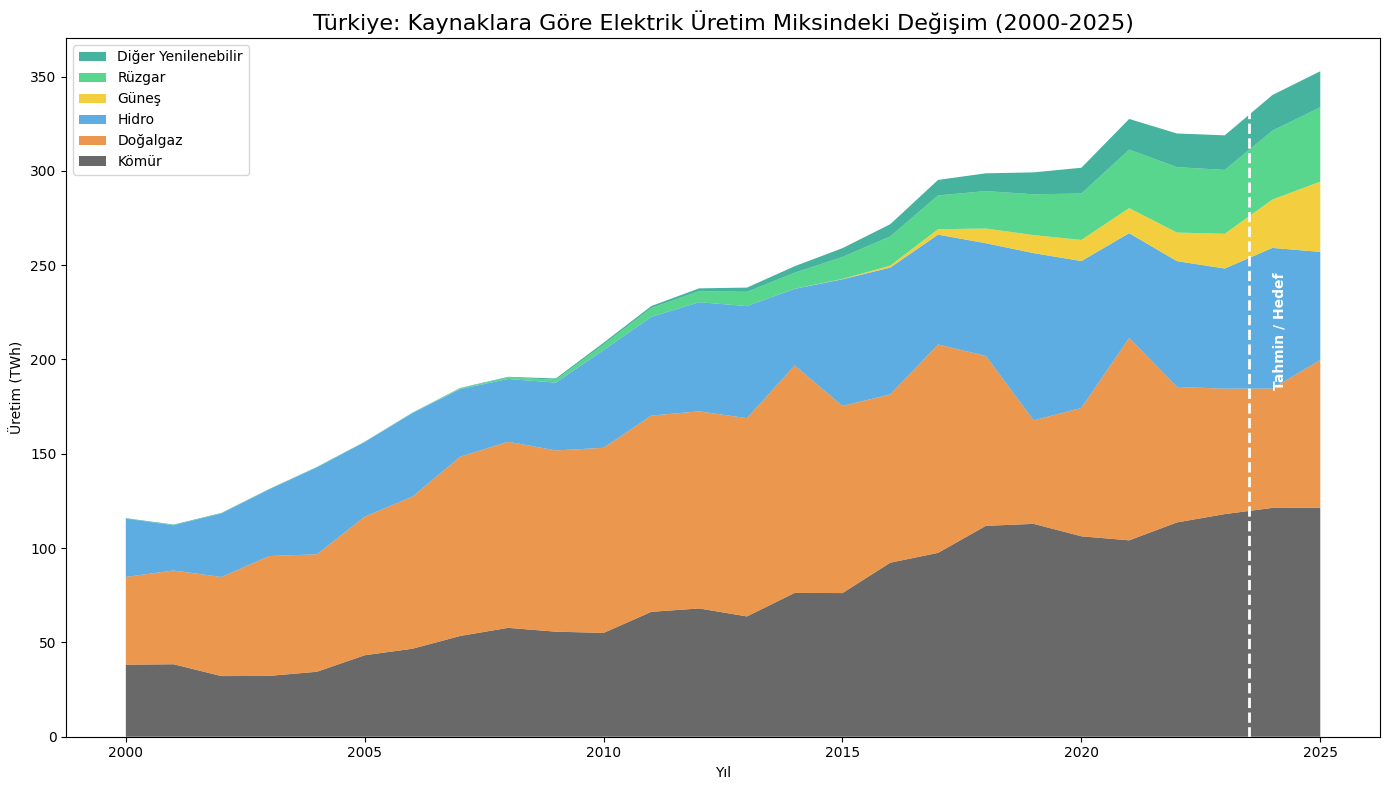

In [1]:
# ============================================
# TÜRKİYE ENERJİ ANALİZİ: 2000-2025 KAPSAMLI RAPOR
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. VERİ YÜKLEME VE FİLTRELEME
try:
    df = pd.read_csv('energy-data.csv')
    tr = df[df['country'] == 'Turkey'].sort_values('year')
    # Analiz kapsamı: 2000-2025
    tr_focus = tr[(tr['year'] >= 2000) & (tr['year'] <= 2025)].copy()
except Exception as e:
    print(f"Veri yükleme hatası: {e}")

# 2. HESAPLAMALAR
tr_focus['elec_gen_growth_pct'] = tr_focus['electricity_generation'].pct_change() * 100
tr_focus['solar_share'] = (tr_focus['solar_electricity'] / tr_focus['electricity_generation']) * 100
tr_focus['wind_share'] = (tr_focus['wind_electricity'] / tr_focus['electricity_generation']) * 100

# 3. GÖRSELLEŞTİRME (Trend Analizi)
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.style.use('seaborn-v0_8-muted')

# Bar: Toplam Elektrik Üretimi (TWh)
ax1.bar(tr_focus['year'], tr_focus['electricity_generation'], color='skyblue', alpha=0.3, label='Üretim (TWh)')
ax1.set_ylabel('Toplam Elektrik Üretimi (TWh)', fontweight='bold')
ax1.set_xlabel('Yıl')

# Line: Yenilenebilir Payı (%)
ax2 = ax1.twinx()
ax2.plot(tr_focus['year'], tr_focus['renewables_share_elec'], color='darkgreen', marker='s', markersize=4, linewidth=2, label='Yenilenebilir Payı (%)')
ax2.set_ylabel('Yenilenebilir Payı (%)', fontweight='bold', color='darkgreen')

# Ayrım Çizgisi (Gerçekleşen vs Projeksiyon)
plt.axvline(x=2023.5, color='red', linestyle='--', alpha=0.6)
plt.text(2012, ax2.get_ylim()[1]*0.95, 'TARİHSEL VERİ', color='gray', fontweight='bold', ha='center')
plt.text(2024.5, ax2.get_ylim()[1]*0.95, 'PROJEKSİYON', color='red', fontweight='bold', ha='center')

plt.title('Türkiye: Enerji Üretim Kapasitesi ve Yeşil Dönüşüm (2000-2025)', fontsize=15, pad=25)
fig.legend(loc="upper left", bbox_to_anchor=(0.12, 0.88))
plt.tight_layout()
plt.show()

# 4. DIŞ KAYNAK (EMBER/EPİAŞ) TUTARLILIK KONTROLÜ (2020-2023)
ext_benchmarks = pd.DataFrame({
    'year': [2020, 2021, 2022, 2023],
    'ext_gen_twh': [306.0, 331.0, 326.0, 326.0],
    'ext_renew_pct': [42.0, 36.0, 42.0, 42.0]
})
comparison = pd.merge(tr_focus[['year', 'electricity_generation', 'renewables_share_elec']], ext_benchmarks, on='year')
comparison['gen_sapma_%'] = ((comparison['electricity_generation'] - comparison['ext_gen_twh']) / comparison['ext_gen_twh']) * 100

# 5. ÖZET RAPOR
print("\n--- 1. VERİ TUTARLILIK ANALİZİ (2020-2023) ---")
display(comparison.round(2))

print("\n--- 2. YILLIK ANALİZ VERİLERİ (Son 10 Yıl Detayı) ---")
display(tr_focus[['year', 'electricity_generation', 'elec_gen_growth_pct', 'renewables_share_elec', 'solar_share', 'wind_share']].tail(10).set_index('year').round(2))


# 6. KAYNAK BAZLI KIRILIM (STACKED AREA CHART)
# Not: Veri setinde bu sütunların olduğunu varsayıyoruz (Ember/BP standardı)
source_cols = ['coal_electricity', 'gas_electricity', 'hydro_electricity',
               'solar_electricity', 'wind_electricity', 'other_renewable_electricity']
source_labels = ['Kömür', 'Doğalgaz', 'Hidro', 'Güneş', 'Rüzgar', 'Diğer Yenilenebilir']

fig, ax3 = plt.subplots(figsize=(14, 8))

# Alan Grafiği Çizimi
ax3.stackplot(tr_focus['year'],
              tr_focus[source_cols].T,
              labels=source_labels,
              alpha=0.8,
              colors=['#444444', '#e67e22', '#3498db', '#f1c40f', '#2ecc71', '#16a085'])

ax3.set_title('Türkiye: Kaynaklara Göre Elektrik Üretim Miksindeki Değişim (2000-2025)', fontsize=16)
ax3.set_ylabel('Üretim (TWh)')
ax3.set_xlabel('Yıl')
ax3.legend(loc='upper left', reverse=True)

# 2023 Kritik Çizgisi
plt.axvline(x=2023.5, color='white', linestyle='--', linewidth=2)
plt.text(2024, ax3.get_ylim()[1]*0.5, 'Tahmin / Hedef', color='white', fontweight='bold', rotation=90)

plt.tight_layout()
plt.show()